In [1]:
from google.colab import files
uploaded = files.upload()


Saving olist_customers_dataset.csv to olist_customers_dataset.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving olist_orders_dataset.csv to olist_orders_dataset.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv


In [1]:
from google.colab import files
uploaded = files.upload()

Saving olist_order_reviews_dataset.csv to olist_order_reviews_dataset.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving olist_products_dataset.csv to olist_products_dataset.csv


In [4]:
# 1. Import pandas
import pandas as pd

# 2. Load datasets
orders_df = pd.read_csv('olist_orders_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
customers_df = pd.read_csv('olist_customers_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')

# 3. Merge them step-by-step
merged_df = pd.merge(orders_df, order_items_df, on='order_id')
merged_df = pd.merge(merged_df, customers_df, on='customer_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')
merged_df = pd.merge(merged_df, reviews_df, on='order_id')

# 4. Preview the final dataframe
merged_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02-10-2017 10:56,02-10-2017 11:07,04-10-2017 19:55,10-10-2017 21:25,18-10-2017 00:00,1,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24-07-2018 20:41,26-07-2018 03:24,26-07-2018 14:31,07-08-2018 15:27,13-08-2018 00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,400.0,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08-08-2018 08:38,08-08-2018 08:55,08-08-2018 13:50,17-08-2018 18:06,04-09-2018 00:00,1,aa4383b373c6aca5d8797843e5594415,...,420.0,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18-11-2017 19:28,18-11-2017 19:45,22-11-2017 13:39,02-12-2017 00:28,15-12-2017 00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,450.0,30.0,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,13-02-2018 21:18,13-02-2018 22:20,14-02-2018 19:46,16-02-2018 18:17,26-02-2018 00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,250.0,51.0,15.0,15.0,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [6]:
# Convert the timestamp to datetime (with dayfirst=True)
merged_df["order_purchase_timestamp"] = pd.to_datetime(
    merged_df["order_purchase_timestamp"],
    dayfirst=True
)

# Extract the hour from the timestamp
merged_df["hour"] = merged_df["order_purchase_timestamp"].dt.hour

# Count number of orders per hour
peak_hours = merged_df["hour"].value_counts().sort_index()

# Display peak hour results
print(peak_hours)


hour
0     2706
1     1283
2      578
3      307
4      245
5      217
6      556
7     1374
8     3384
9     5417
10    7026
11    7421
12    6797
13    7396
14    7556
15    7352
16    7619
17    7006
18    6539
19    6686
20    6850
21    6895
22    6540
23    4622
Name: count, dtype: int64


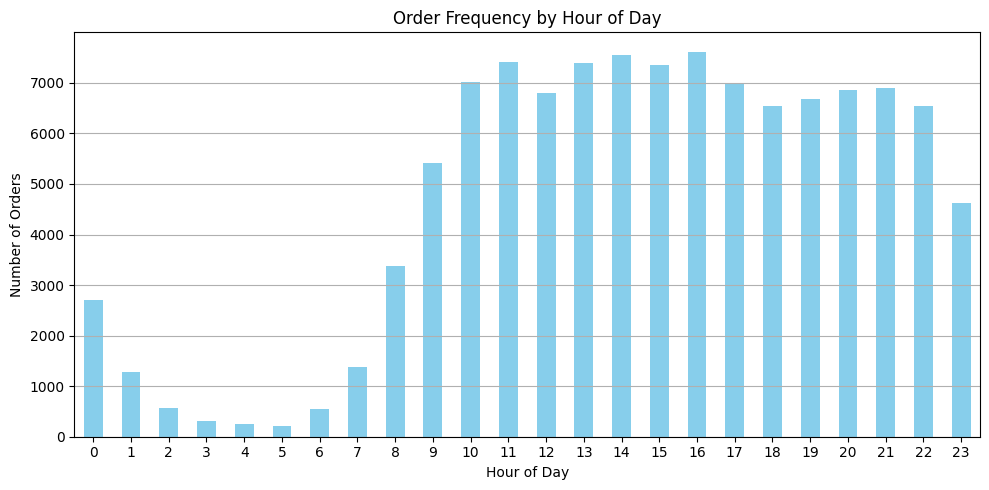

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
peak_hours.plot(kind='bar', color='skyblue')
plt.title('Order Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [9]:
# Group by customer and count unique order_ids
user_orders = merged_df.groupby('customer_unique_id')['order_id'].nunique()

# Count repeat customers (more than 1 order)
repeat_customers = (user_orders > 1).sum()
one_time_customers = (user_orders == 1).sum()


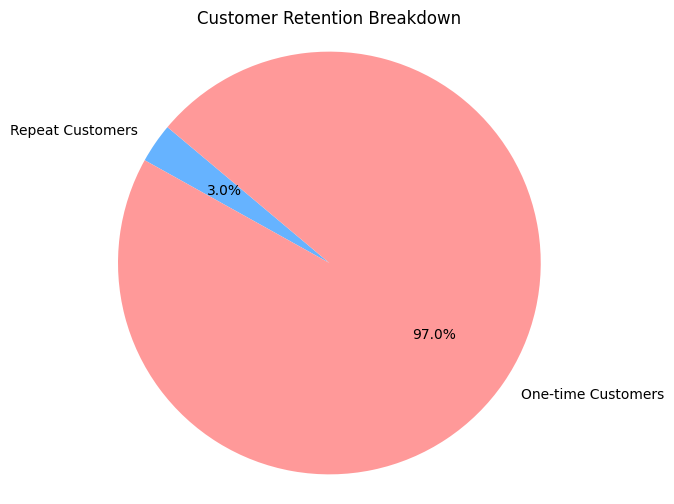

In [10]:
import matplotlib.pyplot as plt

# Pie chart labels and values
labels = ['Repeat Customers', 'One-time Customers']
sizes = [repeat_customers, one_time_customers]

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.axis('equal')  # Equal aspect ratio makes the pie circular
plt.title("Customer Retention Breakdown")
plt.show()


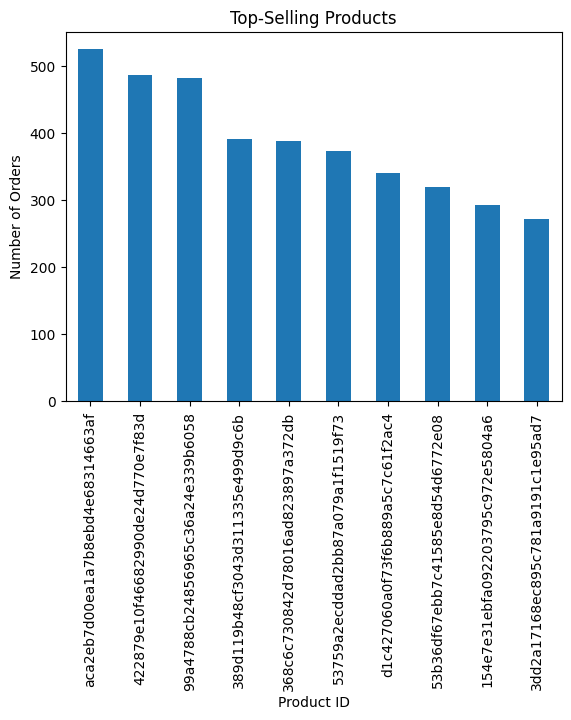

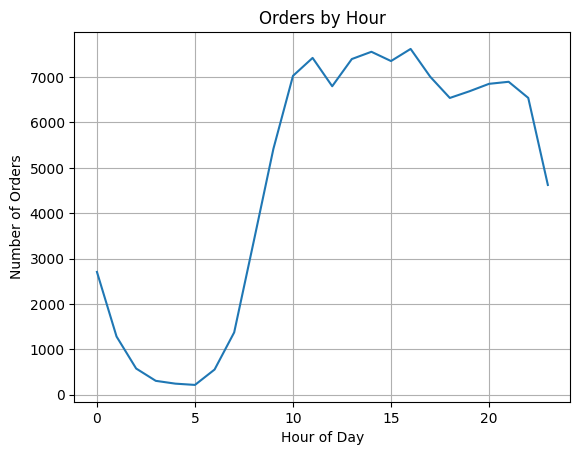

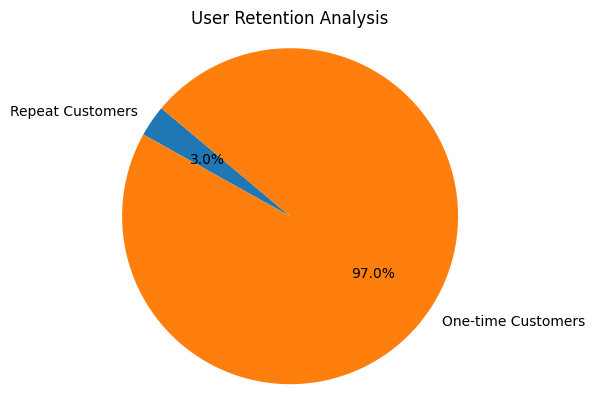

In [11]:
import matplotlib.pyplot as plt

# Bar Chart – Top Products
top_products.plot(kind='bar', title="Top-Selling Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Orders")
plt.show()

# Line Chart – Orders per Hour
peak_hours.plot(kind='line', title="Orders by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

# Pie Chart – Customer Retention
labels = ['Repeat Customers', 'One-time Customers']
sizes = [repeat_customers, user_orders.count() - repeat_customers]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("User Retention Analysis")
plt.show()
